# **Feature Discretization**

In [15]:
# Install it for the first time
#!pip install feature_engine

# EqualFrequencyDiscretiser

The EqualFrequencyDiscretiser() sorts the variable values into contiguous intervals of equal proportion of observations. 

The limits of the intervals are calculated according to the **quantiles**. The number of intervals or quantiles should be determined by the user. 

The transformer can return the variable as numeric or object (default = numeric).

The EqualFrequencyDiscretiser() works only with numerical variables. 

A list of variables can be indiacated, or the imputer will automatically select all numerical variables in the train set.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from feature_engine import discretisers as dsc

In [17]:
# Load dataset
data = pd.read_csv('housingprice.csv')

In [18]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [19]:
# Separate into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(
            data.drop(['Id', 'SalePrice'], axis=1),
            data['SalePrice'], test_size=0.3, random_state=0)

In [20]:
# set up the discretisation transformer
disc = dsc.EqualFrequencyDiscretiser(q=10, variables=['LotArea', 'GrLivArea'])

# fit the transformer
disc.fit(X_train)

EqualFrequencyDiscretiser(q=10, return_boundaries=False, return_object=False,
                          variables=['LotArea', 'GrLivArea'])

In [21]:
# transform the data
train_t= disc.transform(X_train)
test_t= disc.transform(X_test)

In [22]:
disc.binner_dict_

{'GrLivArea': [-inf,
  912.0,
  1069.6000000000001,
  1211.3000000000002,
  1344.0,
  1479.0,
  1603.2000000000003,
  1716.0,
  1893.0000000000005,
  2166.3999999999996,
  inf],
 'LotArea': [-inf,
  5007.1,
  7164.6,
  8165.700000000001,
  8882.0,
  9536.0,
  10200.0,
  11046.300000000001,
  12166.400000000001,
  14373.9,
  inf]}

## Visualize the Bins

With equal frequency discretisation, each bin contains approximately the same number of observations.

Text(0, 0.5, 'Number of houses')

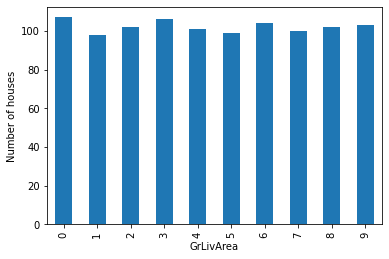

In [23]:
train_t.groupby('GrLivArea')['GrLivArea'].count().plot.bar()
plt.ylabel('Number of houses')

# EqualWidthDiscretiser

The EqualWidthDiscretiser() sorts the variable values into contiguous intervals of equal size. 

The size of the interval is calculated as:

**( max(X) - min(X) ) / bins**

where bins, which is the number of intervals, should be determined by the user. 

The transformer can return the variable as numeric or object (default = numeric).

The EqualWidthDiscretiser() works only with numerical variables. A list of variables can be indicated, or the imputer will automatically select all numerical variables in the train set.

In [24]:
# set up the discretisation transformer
disc = dsc.EqualWidthDiscretiser(bins=10, variables=['LotArea', 'GrLivArea'])

# fit the transformer
disc.fit(X_train)

# transform the data
train_t= disc.transform(X_train)
test_t= disc.transform(X_test)

disc.binner_dict_

{'GrLivArea': [-inf,
  768.2,
  1202.4,
  1636.6,
  2070.8,
  2505.0,
  2939.2,
  3373.4,
  3807.6,
  4241.799999999999,
  inf],
 'LotArea': [-inf,
  22694.5,
  44089.0,
  65483.5,
  86878.0,
  108272.5,
  129667.0,
  151061.5,
  172456.0,
  193850.5,
  inf]}

Text(0, 0.5, 'Number of houses')

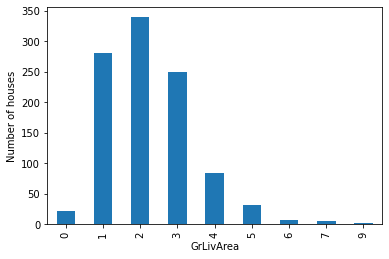

In [25]:
train_t.groupby('GrLivArea')['GrLivArea'].count().plot.bar()
plt.ylabel('Number of houses')

# DecisionTreeDiscretiser

The DecisionTreeDiscretiser() divides the numerical variable into groups estimated by a decision tree. 

In other words, the bins are the predictions made by a decision tree. More details in the API Reference section at the end of this page. 

A grid with parameters can be passed to find the best performing tree, determining the scoring metric and cross-validation fold.

The DecisionTreeDiscretiser() works only with numerical variables. A list of variables can be indicated, or the imputer will automatically select all numerical variables in the train set.

In [26]:
# set up the discretisation transformer
disc = dsc.DecisionTreeDiscretiser(cv=3,
                              scoring='neg_mean_squared_error',
                              variables=['LotArea', 'GrLivArea'],
                              regression=True)

# fit the transformer
disc.fit(X_train, y_train)

# transform the data
train_t= disc.transform(X_train)
test_t= disc.transform(X_test)

disc.binner_dict_

{'GrLivArea': GridSearchCV(cv=3, error_score=nan,
              estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
              iid='deprecated', n_jobs=None,
              param_grid={'max_depth': [1, 2, 3, 4]}, pre_dispatch='2*n_jobs',
              refit=True, return_train_score=False

Text(0, 0.5, 'Number of houses')

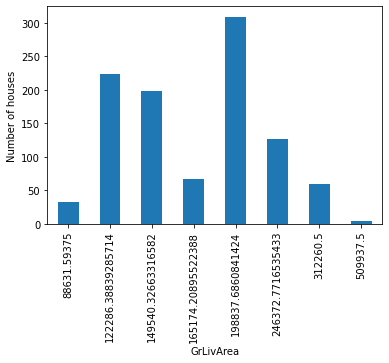

In [27]:
train_t.groupby('GrLivArea')['GrLivArea'].count().plot.bar()
plt.ylabel('Number of houses')